In [3]:
import librosa
from scipy.io import wavfile as wav
import numpy as np

filename = 'C:/Users/Sil/Documents/Ableton/User Library/Samples/Bryson Tiller Drum Kit/Kicks/BTDK_Kick_01.wav'

librosa_audio, librosa_sample_rate = librosa.load(filename)
scipy_sample_rate, scipy_audio = wav.read(filename)

print('Original sample rate:', scipy_sample_rate)
print('Librosa sample rate', librosa_sample_rate)

Original sample rate: 44100
Librosa sample rate 22050


C:\Users\Sil\Anaconda3\envs\testenv\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


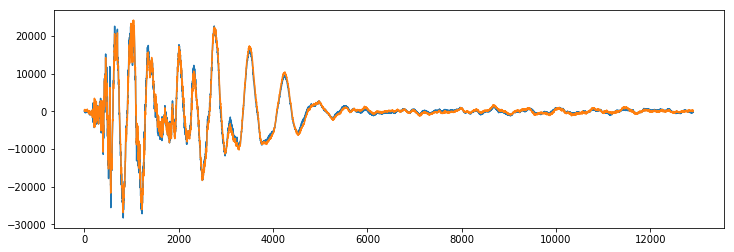

In [4]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)

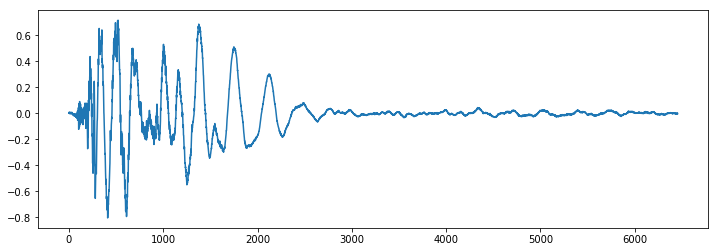

In [5]:
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio)

In [6]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate,n_mfcc=40)
print(mfccs.shape)
stft = np.abs(librosa.stft(librosa_audio))
chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=librosa_sample_rate).T, axis=0)

(40, 13)


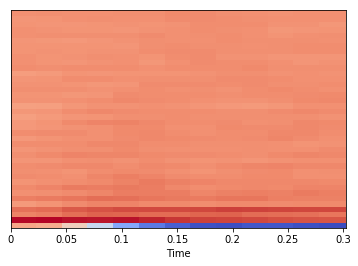

In [7]:
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

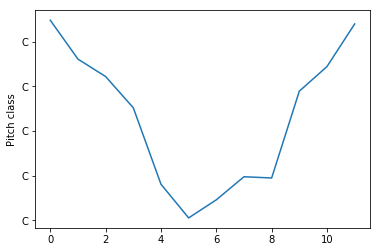

In [8]:
import matplotlib.pyplot as plt
values = chroma
plt.figure()
ax = plt.gca()
ax.plot(values)
ax.yaxis.set_major_formatter(librosa.display.ChromaFormatter())
ax.set_ylabel('Pitch class')
plt.show()

In [9]:
import librosa
from scipy.io import wavfile as wav
import numpy as np
import pandas as pd
import os

def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        stft = np.abs(librosa.stft(audio))
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
        mfccsscaled = np.mean(mfccs.T, axis=0)
    except Exception as e:
        print("Error encountered while parsing file:", file_name)
        return None
    
    return mfccsscaled, chroma

metadata = pd.read_csv('C:/dev/school/samples.csv')

features = []

for index, row in metadata.iterrows():
    
    file_name = str(row["path"])
    class_label = row[1]
    data, data2 = extract_features(file_name)
    #print(data)
    features.append([data, class_label])
    print(data2)

featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 

[0.8068435  0.7617933  0.7376795  0.6661191  0.5261443  0.43229163
 0.43421754 0.5045937  0.5656543  0.6016276  0.6379941  0.73741096]
[0.41748187 0.36334106 0.4698305  0.6134746  0.5507572  0.4058721
 0.3485371  0.38855156 0.39652565 0.45166945 0.56208026 0.45069888]
[0.5074753  0.5569973  0.7336973  0.8468956  0.7943103  0.5858405
 0.43436155 0.36838537 0.33631843 0.36077514 0.43759158 0.4710546 ]
[0.30933255 0.37802768 0.48154137 0.5376608  0.56036687 0.5012963
 0.36862636 0.35950038 0.4022563  0.45501    0.41263875 0.34808296]
[0.7299495  0.7305155  0.6805186  0.6054153  0.54036635 0.51762563
 0.5019633  0.53862256 0.63531214 0.6901786  0.7188055  0.71728694]
[0.400622   0.37802708 0.41103134 0.4431063  0.4208268  0.37863243
 0.39075696 0.47035587 0.5254472  0.5498247  0.46827254 0.42298236]
[0.44347283 0.49664077 0.6735029  0.79109365 0.7298346  0.54846936
 0.5081593  0.5552538  0.6109363  0.61775357 0.53697544 0.4640423 ]
[0.72597605 0.7440396  0.76743907 0.7546456  0.73056954 0.

[0.92241204 0.7751021  0.8357718  0.7305297  0.76725113 0.87925816
 0.8673726  0.80620205 0.9217967  0.93678844 0.90290326 0.91872   ]
[0.97515273 0.70947146 0.67811465 0.61732155 0.5406816  0.63743585
 0.63038146 0.80275726 0.8498358  0.85139203 0.80310166 0.85944515]
[0.8770958  0.7880256  0.6865679  0.5855652  0.66795087 0.8607651
 0.76914483 0.8498726  0.971892   0.7866578  0.76374835 0.8073839 ]
[0.8812262  0.93023545 0.87359047 0.7912148  0.87016183 0.91810226
 0.9037277  0.8269411  0.7712737  0.7283306  0.86110437 0.9123183 ]
[0.953441   0.9339756  0.8069212  0.75940627 0.72901356 0.69927174
 0.7732914  0.9071923  0.8471374  0.8636789  0.77401966 0.88024503]
[0.81195754 0.93967813 0.88238114 0.79148126 0.7200129  0.7178145
 0.7543954  0.9439451  0.8498599  0.7735964  0.81442904 0.80065113]
[0.70772874 0.53302515 0.43323365 0.44960007 0.30068073 0.4265628
 0.54914045 0.59369045 1.         0.7514204  0.71398485 0.74175286]


C:\Users\Sil\Anaconda3\envs\testenv\lib\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


[0.8097187  0.823627   0.7217258  0.9430226  0.7471674  0.7590677
 0.8279443  0.70912325 0.66557324 0.6367555  0.72034746 0.77850634]
[0.6944081  0.8178002  0.9927232  0.89339936 0.7809959  0.73656714
 0.73872274 0.6728111  0.7277517  0.76346207 0.76132697 0.6777776 ]
[0.6959207  0.5749562  0.51691186 0.87130815 0.8894923  0.6361368
 0.6460297  0.71120304 0.836097   0.80825627 0.9442073  0.8098207 ]
[0.8238802  0.70556766 0.57214195 0.40339065 0.40019855 0.44114572
 0.5321756  0.6954564  0.95276576 0.96841776 0.9340081  0.69581985]
[0.992966   0.54032713 0.5183817  0.5791351  0.56522167 0.7499609
 0.833449   0.7479482  0.68474627 0.7354174  0.8203007  0.9886185 ]
[0.9090101  0.76780385 0.7184753  0.6945659  0.7397728  0.7626702
 0.77113277 0.8525992  0.83122396 0.91377836 0.90502346 0.9397635 ]
[0.6700349  0.4762118  0.30981255 0.26159114 0.268148   0.35416442
 0.4626217  0.46201956 0.9053809  0.9291282  1.         0.85214293]
[0.8420792  0.7206861  0.57202077 0.38682836 0.38732454 0.4

 0.74099964 0.8067747  0.8889381  0.93788224 0.8604827  0.7445923 ]
[0.72102636 0.6807139  0.6113455  0.5396991  0.5637426  0.63956076
 0.79191303 0.91791433 0.9643158  0.92545474 0.7549932  0.7145379 ]
[0.7559086  0.670857   0.6276958  0.66124696 0.72947484 0.8879024
 0.91086614 0.9898348  0.81718695 0.6228992  0.62935525 0.73029447]
[0.21747579 0.45884526 0.2822569  0.21798514 0.2607571  0.46649954
 0.9768021  0.7943202  0.4450107  0.2902626  0.19555886 0.17222473]
[0.6329865  0.71673083 0.88512284 0.7794925  0.68227565 0.7086531
 0.89682364 0.70588803 0.56572175 0.43555248 0.35010257 0.44616017]
[0.33180144 0.35257283 0.48347217 0.7328504  0.57962465 0.54337424
 0.26732704 0.25331396 0.18667257 0.21863651 0.20749825 0.2900106 ]
[0.40404713 0.3826288  0.4171765  0.5396943  0.5309682  0.34113574
 0.52457404 0.75462615 0.7436801  0.6070496  0.45948222 0.5126894 ]
[0.65502125 0.60927373 0.64340407 0.65909153 0.2657239  0.34500137
 0.6216451  0.56854296 0.6072835  0.5797241  0.72688794 0

 0.7815344  0.7962227  0.8706049  0.908418   0.84828943 0.8714504 ]
[0.84566545 0.79910004 0.7359641  0.8221601  0.91441524 0.8667837
 0.8530941  0.8663401  0.8322721  0.76455486 0.7853444  0.8191076 ]
[0.97864616 0.699401   0.62383795 0.58933    0.6508156  0.686743
 0.6971917  0.58960295 0.57083297 0.56658536 0.7087088  0.7260547 ]
[0.81524736 0.795837   0.81144863 0.95967597 0.9042591  0.7207894
 0.6537499  0.81942767 0.75438684 0.59503466 0.6755316  0.8575147 ]
[0.85038775 0.8691458  0.79242927 0.70196944 0.734788   0.7419193
 0.8352173  0.80729365 0.95953876 0.818435   0.7585867  0.7056823 ]
[0.75618416 0.80673486 0.88713574 0.8346195  0.75915617 0.7013193
 0.6425756  0.69131434 0.7731572  0.7887043  0.775724   0.7568238 ]
[0.97124076 0.7430005  0.6145793  0.59656096 0.6330795  0.70929784
 0.7296996  0.6019783  0.58564097 0.5665483  0.6593152  0.7111965 ]
[0.94931555 0.70311826 0.6808506  0.68526816 0.7261927  0.782055
 0.8246474  0.6850954  0.64992774 0.62478834 0.7958808  0.82086

In [10]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features to numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

Using TensorFlow backend.


In [28]:
y

array(['Bassline', 'Bassline', 'Bassline', 'Bassline', 'Bassline',
       'Bassline', 'Bassline', 'Bassline', 'Bassline', 'Bassline',
       'Bassline', 'Bassline', 'Bassline', 'Bassline', 'Bassline',
       'Bassline', 'Bassline', 'Bassline', 'Bassline', 'Bassline',
       'Bassline', 'Bassline', 'Bassline', 'Bassline', 'Bassline',
       'Bassline', 'Bassline', 'Break', 'Break', 'Break', 'Break',
       'Break', 'Break', 'Break', 'Break', 'Break', 'Break', 'Break',
       'Break', 'Break', 'Break', 'Break', 'Break', 'Break', 'Break',
       'Break', 'Break', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap', 'Clap',
       'Clap', 'Crash', 'Crash', 'Crash', 'Crash', 'Crash', 'Crash',
       'Crash', 'Crash', 'Crash', 'Crash', 'Hat', 'Hat', 'Hat', 'Hat',
       'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat',
       'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat',
       'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat', 'Hat',
       'Hat', 'Hat', 'Hat', 'Hat', 

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 10)

In [13]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics

num_labels = yy.shape[1]
filter_size = 2

model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [15]:
model.summary()

score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               10496     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 2056      
__________

In [16]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 
from keras.models import model_from_json

num_epochs = 100
num_batch_size = 32

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start

print("Training completed in time: ", duration)



Saved model to disk
Instructions for updating:
Use tf.cast instead.
Train on 172 samples, validate on 44 samples
Epoch 1/100
172/172 [==============================] - 1s 3ms/step - loss: 13.1882 - acc: 0.1047 - val_loss: 11.8231 - val_acc: 0.1136

Epoch 00001: val_loss improved from inf to 11.82305, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 2/100
172/172 [==============================] - 0s 180us/step - loss: 12.1951 - acc: 0.1802 - val_loss: 12.8212 - val_acc: 0.2045

Epoch 00002: val_loss did not improve from 11.82305
Epoch 3/100
172/172 [==============================] - 0s 203us/step - loss: 11.8407 - acc: 0.2558 - val_loss: 12.8212 - val_acc: 0.2045

Epoch 00003: val_loss did not improve from 11.82305
Epoch 4/100
172/172 [==============================] - 0s 220us/step - loss: 11.9678 - acc: 0.2326 - val_loss: 12.8212 - val_acc: 0.2045

Epoch 00004: val_loss did not improve from 11.82305
Epoch 5/100
172/172 [==============================] - 0s 209us/step - 

172/172 [==============================] - 0s 220us/step - loss: 7.0888 - acc: 0.5233 - val_loss: 6.1496 - val_acc: 0.6136

Epoch 00039: val_loss did not improve from 6.13622
Epoch 40/100
172/172 [==============================] - 0s 244us/step - loss: 6.1653 - acc: 0.6047 - val_loss: 6.3692 - val_acc: 0.5909

Epoch 00040: val_loss did not improve from 6.13622
Epoch 41/100
172/172 [==============================] - 0s 203us/step - loss: 6.5117 - acc: 0.5640 - val_loss: 5.9310 - val_acc: 0.5455

Epoch 00041: val_loss improved from 6.13622 to 5.93096, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 42/100
172/172 [==============================] - 0s 191us/step - loss: 6.2339 - acc: 0.5872 - val_loss: 5.4418 - val_acc: 0.6136

Epoch 00042: val_loss improved from 5.93096 to 5.44177, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 43/100
172/172 [==============================] - 0s 162us/step - loss: 6.4734 - acc: 0.5698 - val_loss: 6.0255 - val_acc: 0.5909




Epoch 00077: val_loss did not improve from 3.07914
Epoch 78/100
172/172 [==============================] - 0s 191us/step - loss: 4.4064 - acc: 0.6570 - val_loss: 5.1911 - val_acc: 0.6364

Epoch 00078: val_loss did not improve from 3.07914
Epoch 79/100
172/172 [==============================] - 0s 174us/step - loss: 3.9940 - acc: 0.6860 - val_loss: 4.9692 - val_acc: 0.6364

Epoch 00079: val_loss did not improve from 3.07914
Epoch 80/100
172/172 [==============================] - 0s 174us/step - loss: 3.9848 - acc: 0.7093 - val_loss: 4.8113 - val_acc: 0.6364

Epoch 00080: val_loss did not improve from 3.07914
Epoch 81/100
172/172 [==============================] - 0s 162us/step - loss: 4.0488 - acc: 0.6802 - val_loss: 4.5055 - val_acc: 0.6364

Epoch 00081: val_loss did not improve from 3.07914
Epoch 82/100
172/172 [==============================] - 0s 174us/step - loss: 3.8172 - acc: 0.6802 - val_loss: 4.7949 - val_acc: 0.6364

Epoch 00082: val_loss did not improve from 3.07914
Epoch 83

In [20]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.8255813939626827
Testing Accuracy:  0.7045454545454546


In [34]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return np.array([mfccsscaled])

In [37]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print(le.inverse_transform(predicted_vector))
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [38]:
filename = 'C:/Users/Sil/Documents/Ableton/User Library/Samples/Muffled Drums Vol. 1/Cymbals/Ride/Ride (28).wav' 
print_prediction(filename)

['Snare']
The predicted class is: Snare 

Bassline 		 :  0.00000000000000000000000608377616
Break 		 :  0.00000000000000000521493328847066
Clap 		 :  0.00000000000000000000045294555447
Crash 		 :  0.00000000000000894004566421224486
Hat 		 :  0.00000000000000017070051168712982
Kick 		 :  0.00000000000000000000000000000000
Perc 		 :  0.01788126863539218902587890625000
Snare 		 :  0.98211872577667236328125000000000
